<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/homework_2/hw2_problem2b_standard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

In [32]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

from IPython.display import display
#display(df)

In [33]:
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
varlist =  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df = df[varlist]
#df.head()

In [34]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
#df.head()


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#don't normalize output
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#normalize output
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()





,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0


In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [37]:
y_train = df_train.pop('price') # seperate x from y
y_val = df_val.pop('price')

y_train = y_train.to_numpy() # convert to numpy array for matrix multiplication
y_val = y_val.to_numpy()


x_train = df_train.to_numpy()
x_val = df_val.to_numpy()



X_0 = np.ones((len(y_train), 1)) # put together input vector
x_train = np.hstack((X_0, x_train))

tmp = np.ones((len(x_val), 1))
x_val = np.hstack((tmp, x_val))

In [38]:
def compute_loss(X, y, theta):

    m = len(y)

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [39]:
def gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations):

    m = len(y_train)  # Number of training examples
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)


    for i in range(iterations):

        predictions = np.dot(x_train, theta)

        theta = theta - (1/m)*alpha*(x_train.T.dot(predictions-y_train))

        training_loss_history[i] = compute_loss(x_train, y_train, theta)
        validation_loss_history[i] = compute_loss(x_val, y_val, theta)


    return theta, training_loss_history, validation_loss_history

In [40]:
def predict_value(x1,x2,x3, theta):
  input = np.array([1, x1, x2, x3])
  pred_val = input.dot(theta)

  return pred_val

In [41]:
#run gradient decent

theta = np.zeros(x_train.shape[1]) #initalize theta

iterations = 300
alpha = 0.08

theta, training_loss_history, validation_loss_history = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations)
print('Final value of theta =', theta)
#print('loss_history =', training_loss_history[:5], '...')

Final value of theta = [-0.47614803  0.30295116  0.03579271  0.31030605  0.20573551  0.20616237
  0.20159119  0.16799092  0.30219249  0.42281585  0.12871841  0.31594322]


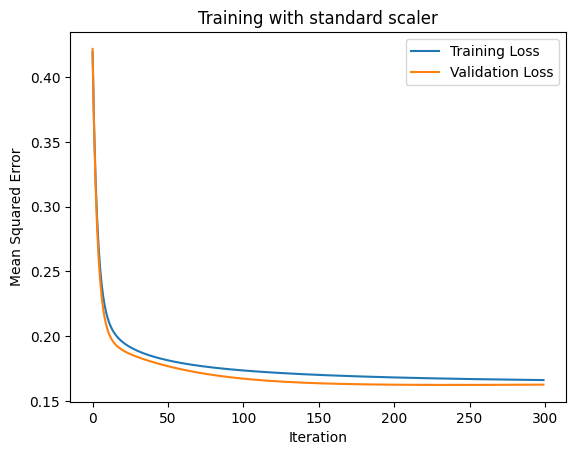

In [42]:
# Plot the training and validation loss after each iteration
plt.plot(training_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training with standard scaler")
plt.show()